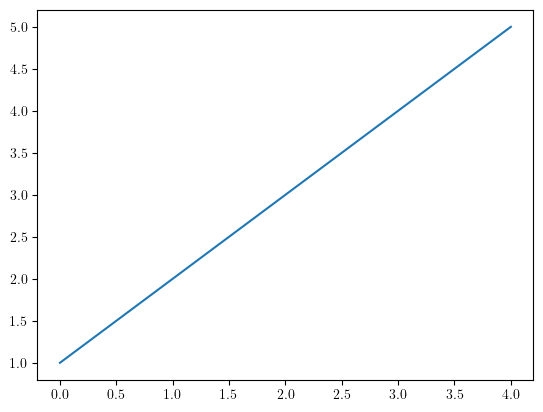

In [2]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc

from scipy import stats
from matplotlib.patches import FancyArrowPatch, ArrowStyle
import scipy.special as scs

rc('text', usetex=True)
rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex',preamble=r'\usepackage[russian]{babel}')

visible_ticks = {
   "top": False,
   "right": False
}

from matplotlib.ticker import AutoMinorLocator

X = [1, 2, 3, 4, 5]
plt.plot(X)

Рисунки к распределениям: биномиальное, нормальное, Пуассона

In [3]:
#############################################################################################
# Probabilitiy distributions
#############################################################################################

def W_bin(N, M, p): #binomial distribution probabilities
    '''
    INPUT: 
        N {non-negative integer} --- number of attempts [dimless]
        M {non-negative integer} --- number of successful attempts [dimless]
        p {real} --- probability of success in a single attempt [dimless]
    OUTPUT: 
        W_bin {real} --- result [dimless]
    '''
    return scs.binom(N, M) * p**M * (1-p)**(N-M)

def W_norm(N, p, x): #normal distribution density (for illustration of central limit theorem)
    '''
    INPUT: 
        N {non-negative integer} --- number of attempts [dimless]
        p {real} --- probability of success in a single attempt [dimless]
        x {real} --- continuous equivalent to number of successes [dimless]
    OUTPUT: 
        W_norm {real} --- result [dimless]
    '''
    x_avg = N*p #calculate average number of successes
    x_std = np.sqrt(N*p*(1-p)) #calculate standart definition of number of successes
    return np.exp(-0.5*((x-x_avg)/x_std)**2)/(x_std*np.sqrt(2*np.pi))

def W_poisson(t, tau, M): #poisson distribution
    '''
    INPUT: 
        t {non-negative real} --- time of observation [s]
        tau {non-negative real} --- average response time [s]
        M {non-negative int} --- number of particles [dimless]
    OUTPUT: 
        W_poisson {real} --- result [dimless]
    '''
    return (t/tau)**M * np.exp(-t/tau) / math.factorial(int(M))

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

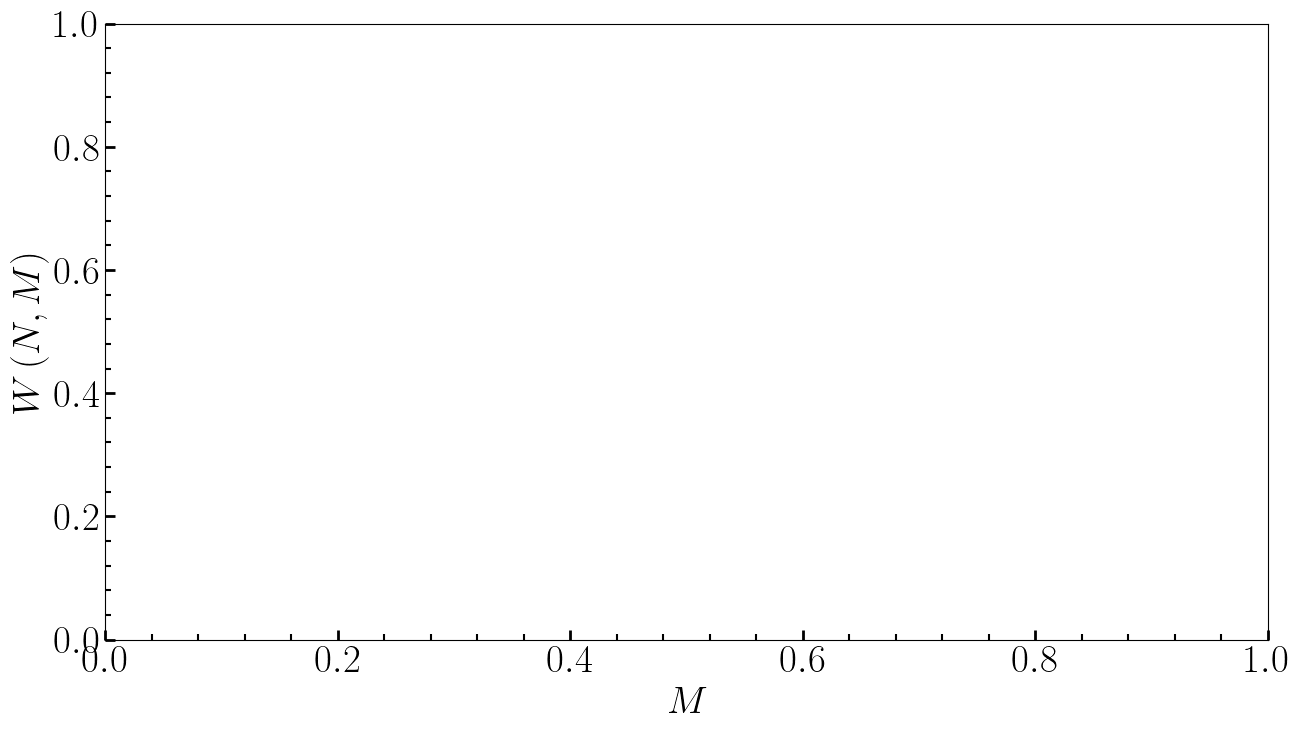

In [4]:
fig1, ax1 = plt.subplots(figsize=(15, 8))
fig1.patch.set_facecolor('white')

x_minor_locator = AutoMinorLocator(5)
ax1.xaxis.set_minor_locator(x_minor_locator)
y_minor_locator = AutoMinorLocator(5)
ax1.yaxis.set_minor_locator(y_minor_locator)

ax1.set_xlabel(r"$M$", fontsize=35/1.25)
ax1.set_ylabel(r"$W\,(N, M)$", fontsize=35/1.25)
plt.tick_params(axis='both', which='major', direction='in', width=2, length=7, labelsize=35/1.25, **visible_ticks)
plt.tick_params(axis='both', which='minor', direction='in', width=1.5, length=4, labelsize=8, **visible_ticks)
plt.grid(b=True, which='major', color='0.65', linestyle='-', lw=2, alpha=0.3)
plt.grid(b=True, which='minor', color='0.65', linestyle='-', lw=0.7, alpha=0.3)

p = 1/4

N = 50
M = np.arange(0, N+1, 1)
M_prob = W_bin(N, M, p)
y_M = max(M_prob)

M_mean = sum(M * M_prob)
M_disp = sum(M**2 * M_prob) - M_mean**2
M_std = np.sqrt(M_disp)

m1 = math.ceil(M_mean - M_std)
M1 = math.floor(M_mean + M_std)
W1 = sum(M_prob[m1:M1+1])

print(m1, M1, W1)

m2 = math.ceil(M_mean - 2*M_std)
M2 = math.floor(M_mean + 2*M_std)
W2 = sum(M_prob[m2:M2+1])

print(m2, M2, W2)

m3 = math.ceil(M_mean - 3*M_std)
M3 = math.floor(M_mean + 3*M_std) + 1
W3 = sum(M_prob[m3:M3+1])

print(m3, M3, W3)

M_int = np.linspace(0, N, 100*N)
M_prob_int = np.interp(M_int, M, M_prob)

ax1.scatter(M, M_prob, color='black', s=80)
ax1.plot(M, M_prob, color='black', lw=0.5)
ax1.plot(M_int, W_norm(N, p, M_int), lw=2, color='red', ls='--')

cond_1 = np.logical_and(M_int > M_mean - M_std, M_int < M_mean + M_std)
cond_2 = np.logical_and(M_int > M_mean - 2*M_std, M_int < M_mean + 2*M_std)
cond_3 = np.logical_and(M_int > M_mean - 3*M_std, M_int < M_mean + 3*M_std)

ax1.fill_between(M_int[cond_1], M_prob_int[cond_1], alpha=0.1)
ax1.fill_between(M_int[cond_2], M_prob_int[cond_2], alpha=0.1)
ax1.fill_between(M_int[cond_3], M_prob_int[cond_3], alpha=0.1)

ax1.axvline(x=M_mean, ls='--', c='k', lw=2)
ax1.axvline(x=M_mean - M_std, ls='--', c='k', lw=2)
ax1.axvline(x=M_mean + M_std, ls='--', c='k', lw=2)
ax1.axvline(x=M_mean - 2*M_std, ls='--', c='k', lw=2)
ax1.axvline(x=M_mean + 2*M_std, ls='--', c='k', lw=2)
ax1.axvline(x=M_mean - 3*M_std, ls='--', c='k', lw=2)
ax1.axvline(x=M_mean + 3*M_std, ls='--', c='k', lw=2)

ax1.set_xlim(max(0, M_mean-5 * M_std), M_mean + 4 * M_std)
ax1.set_ylim(bottom=0)

plt.annotate('', xy=(M_mean-1.5*M_std, 0.06*y_M),  xycoords='data',
            xytext=(M_mean-3.5*M_std, 0.45*y_M), textcoords='data',
            arrowprops=dict(facecolor='white', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )


plt.annotate('', xy=(M_mean+1.5*M_std, 0.06*y_M),  xycoords='data',
            xytext=(M_mean+2.8*M_std, 0.45*y_M), textcoords='data',
            arrowprops=dict(facecolor='white', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )


plt.annotate('', xy=(M_mean-2*M_std, 0.01*y_M),  xycoords='data',
            xytext=(M_mean-3.6*M_std, 0.18*y_M), textcoords='data',
            arrowprops=dict(facecolor='white', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )


plt.annotate('', xy=(M_mean+2.1*M_std, 0.01*y_M),  xycoords='data',
            xytext=(M_mean+3.4*M_std, 0.18*y_M), textcoords='data',
            arrowprops=dict(facecolor='white', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

plt.text(x=M_mean-0.45*M_std, y=0.15*y_M, s=(r'$%.1f$' % (100*W1))+ '\%', backgroundcolor='white', fontsize=25)
plt.text(x=M_mean+2.50*M_std, y=0.50*y_M, s=(r'$%.1f$' % (50*(W2-W1))) + '\%', backgroundcolor='lightgrey', alpha=1, fontsize=25)
plt.text(x=M_mean-3.50*M_std, y=0.50*y_M, s=(r'$%.1f$' % (50*(W2-W1))) + '\%', backgroundcolor='lightgrey', alpha=1, fontsize=25)
plt.text(x=M_mean-3.85*M_std, y=0.25*y_M, s=(r'$%.1f$' % (50*(W3-W2))) + '\%', backgroundcolor='lightgrey', alpha=1, fontsize=25)
plt.text(x=M_mean+3.2*M_std, y=0.25*y_M, s=(r'$%.1f$' % (50*(W3-W2))) + '\%', backgroundcolor='lightgrey', alpha=1, fontsize=25)

plt.annotate('', xy=(M_mean+1*M_std, 0.30*y_M), xytext=(M_mean - 1*M_std, 0.30*y_M), arrowprops=dict(arrowstyle='<->', mutation_scale=30))
plt.annotate('', xy=(M_mean+2*M_std, 0.50*y_M), xytext=(M_mean - 2*M_std, 0.50*y_M), arrowprops=dict(arrowstyle='<->', mutation_scale=30))
plt.annotate('', xy=(M_mean+3*M_std, 0.70*y_M), xytext=(M_mean - 3*M_std, 0.70*y_M), arrowprops=dict(arrowstyle='<->', mutation_scale=30))

plt.text(x=M_mean-0.55*M_std, y=0.32*y_M, s=r'$\pm\sigma$', alpha=1, fontsize=25)
plt.text(x=M_mean-0.65*M_std, y=0.52*y_M, s=r'$\pm 2\sigma$', alpha=1, fontsize=25)
plt.text(x=M_mean-0.65*M_std, y=0.72*y_M, s=r'$\pm 3\sigma$', alpha=1, fontsize=25)

plt.xticks(np.arange(0, 26, 5))
# plt.yticks(np.arange(0, 1.05, 0.1))

plt.tight_layout()
plt.savefig('binomial_distribution.png')
plt.savefig('binomial_distribution.pdf')

print(W1, 0.5*(W2-W1), 0.5*(W3-W2))

In [ ]:
fig2, ax2 = plt.subplots(figsize=(10, 8))
fig2.patch.set_facecolor('white')

x_minor_locator = AutoMinorLocator(5)
ax2.xaxis.set_minor_locator(x_minor_locator)
y_minor_locator = AutoMinorLocator(5)
ax2.yaxis.set_minor_locator(y_minor_locator)

ax2.set_xlabel(r"$t/\tau$", fontsize=40)
ax2.set_ylabel(r"$W_M(t)$", fontsize=40)
plt.tick_params(axis='both', which='major', direction='in', width=2, length=7, labelsize=35, **visible_ticks)
plt.tick_params(axis='both', which='minor', direction='in', width=1.5, length=4, labelsize=8, **visible_ticks)
plt.grid(which='major', color='0.65', linestyle='-', lw=2, alpha=0.3)
plt.grid(which='minor', color='0.65', linestyle='-', lw=0.7, alpha=0.3)

tau = 1
t = np.linspace(0, 10*tau, 300)

colors = ['black', 'red', 'olive', 'navy', 'cyan']

for M in range(4):
    ax2.plot(t, W_poisson(t, tau, M), lw=3, color=colors[M], label=r'$W_{%i}(t)$' % M)

    
plt.xlim(0, 10.05)
plt.ylim(0, 1.02)
plt.xticks(np.arange(0, 10.05, 1))
plt.yticks(np.arange(0, 1.02, 0.1))

plt.legend(loc='best', fontsize=35)

plt.tight_layout()
plt.savefig('Poisson_time.png')
plt.savefig('Poisson_time.pdf')

In [ ]:
fig3, ax3 = plt.subplots(figsize=(10, 8))
fig3.patch.set_facecolor('white')

x_minor_locator = AutoMinorLocator(2)
ax3.xaxis.set_minor_locator(x_minor_locator)
y_minor_locator = AutoMinorLocator(5)
ax3.yaxis.set_minor_locator(y_minor_locator)

ax3.set_xlabel(r"$M$", fontsize=40)
ax3.set_ylabel(r"$W_M(t)$", fontsize=40)
plt.tick_params(axis='both', which='major', direction='in', width=2, length=7, labelsize=35, **visible_ticks)
plt.tick_params(axis='both', which='minor', direction='in', width=1.5, length=4, labelsize=8, **visible_ticks)
plt.grid(b=True, which='major', color='0.65', linestyle='-', lw=2, alpha=0.3)
plt.grid(b=True, which='minor', color='0.65', linestyle='-', lw=0.7, alpha=0.3)

colors = ['black', 'red', 'olive', 'navy', 'cyan']

M = np.arange(0, 21, 1, dtype=int)
time_factors = [2, 5, 10]

for i in range(3):
    Y = np.array([W_poisson(time_factors[i]*tau, tau, m) for m in M])
    ax3.plot(M, Y, color=colors[i], label=r'$W_{M}(t = %i\tau)$' % time_factors[i], ls='--', lw=1, marker = '.', markersize = 20)

plt.xlim(0, 10.05)
plt.ylim(0, 0.302)
plt.xticks(np.arange(0, 20.05, 2))
plt.yticks(np.arange(0, 0.301, 0.05))

plt.legend(loc='best', fontsize=35)

plt.tight_layout()
plt.savefig('Poisson_number.png')
plt.savefig('Poisson_number.pdf')

К задаче 3.2 из дз

In [ ]:
P0 = 101325 #[Pa] normal pressure
k_B = 1.38e-23 #[J/K] Boltzmann's constant
T = 300 #[K] normal temperature
# V0 = 0.01*(0.3048)**3 #[m^3] volume
V0 = 1

print("V0:\t%.2e [m^3]" % V0)

N = P0*V0/(k_B * T) # number of particles
delta_N = 1/np.sqrt(N) # relative fluctuation of N

print("N:\t%.2e " % N)
print("delta_N:\t%.2e " % delta_N)

К задаче 3.3 из дз

In [ ]:
m0 = 0.02e-3 #[kg] mass of needle
chi = 50 # magnetic permittivity of iron
rho = 7.9e3 #[kg/m^3] density of iron
B0 = 0.5e-4 #[T] field intensity
mu_0 = 1.257e-6 #[H/m] vacuum permittivity

V = m0/rho #[m^3] volume of needle
print("V:\t%.2e [m^3]" % V)
gamma = 2*V*chi*B0**2 / mu_0
print("gamma:\t%.2e [J]" % gamma)

sigma_phi = (k_B * T / gamma)**(1/2)
print("sigma_phi:\t%.2e [rad]" % sigma_phi)

К задаче 3.4 из дз

In [12]:
V = 50 #[m^3] volume of room

w_m = 10*np.exp(-25)/np.sqrt(np.pi)
print("w_m:\t%.2e" % w_m)

N = (P0/k_B*T)*V # number of particles in room
print("N:\t%.2e" % N)

M = N*w_m # number of particles with v>v_m
print("M:\t%.2e" % M)
delta_M = 1/np.sqrt(M) # relative fluctuation of M
print("delta_M:\t%.2e" % delta_M)

w_m:	7.84e-11
N:	1.10e+32
M:	8.63e+21
delta_M:	1.08e-11


К задаче 3.5 из дз

In [14]:
T = 77 #[K] temperature
r = 50 #[Ohm] resistor resistance
R = 100 #[Ohm] ampermeter resistance
Delta_f = 10 #[Hz]

sigma_I = np.sqrt(4*k_B*T*Delta_f / (R + r)) #[A]
print("sigma_I:\t%.2e [A]" % sigma_I)

sigma_I:	1.68e-11 [A]
